# Comparaison des potentiels 

L'idée est de comparer 3 différents potentiels (Stillinger-Weber, ReaxFF et le potentiel ML) pour voir lequel colle plus aux données de materialsproject.

On réalise différentes simulations sur du Silicium Bulk avec une simple relaxation. On fait varier le paramètre de mail pour trouver le volume atomique correspondant au minium de l'énergie potentielle atomique. Ainsi on aura $\vec{F} = \vec{\nabla} E = \vec{0}$ et donc une pression nulle.

## Scripts Python

### data.py

Ce fichier contient toutes les données nécessaires à l'élaboration des graphes pour comparer les potentiels : 
- Le nombre d'atomes `nb_atoms`
- La valeur de l'énergie finale du système pour chaque paramètre de maille et pour chaque potentiels (`energies_sw`, `energies_reaxff`, `energies_ML`) sous forme de dictionnaire Python.

In [ ]:
nb_atoms = 512

energies_sw = {
    5.20:-2162.88454000926,
    5.25:-2185.72151412785,
    5.30:-2202.54042251993,
    5.35:-2213.66018486908,
    5.40:-2219.38025634342,
    5.41:-2219.90138829236,
    5.42:-2220.22002275148,
    5.43:-2220.33830647777,
    5.44:-2220.25836117819,
    5.45:-2219.98228396957,
    5.50:-2215.73165376898,
    5.55:-2206.87893132819,
    5.60:-2193.66120682382,
}

energies_reaxff = {
    5.20:-53653.5274840194,
    5.25:-53888.3451265694,
    5.28:-53968.3873573059,
    5.29:-53985.0738692473,
    5.30:-53996.8001966322,
    5.31:-54003.5871227578,
    5.32:-54005.4545499938,
    5.33:-54002.421532895,
    5.35:-53981.7263886136,
    5.40:-53845.4213658125,
    5.45:-53589.7839709036,
    5.50:-53216.5168833381,
}

energies_ML = {
    5.20:-2700.0497984429,
    5.25:-2725.19873145526,
    5.30:-2744.94583066872,
    5.35:-2759.51484859502,
    5.40:-2769.04295691001,
    5.45:-2773.66767700109,
    5.46:-2774.02054202885,
    5.47:-2774.18721730376,
    5.48:-2774.16997205282,
    5.50:-2773.59366064231,
    5.55:-2769.12535499695,
    5.60:-2760.66059495204,
    5.65:-2748.64984439282,
}

### graph.py

Ce script contient l'algorithme pour afficher et comparer les 3 potentiels sur 3 graphiques différents (problème d'échelle) mais sur une même figure. Self-explanatory scripts thanks to comments.

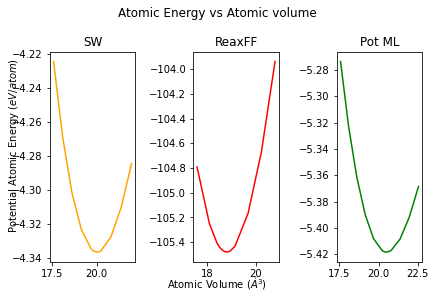

In [3]:
import matplotlib.pyplot as plt
from data import *

# Sort by keys, returns a list of tuples
sw = sorted(energies_sw.items())
reaxff = sorted(energies_reaxff.items())
pot_ml = sorted(energies_ML.items())

# Unpack lists of pairs into two tuples
a_sw, e_sw = zip(*sw)
a_reax, e_reax = zip(*reaxff)
a_pot_ml, e_pot_ml = zip(*pot_ml)

# Convert to correct value for the graph
v_at_sw = [((a*4)**3)/nb_atoms for a in a_sw]
e_at_sw = [e/nb_atoms for e in e_sw]

v_at_reax = [((a*4)**3)/nb_atoms for a in a_reax]
e_at_reax = [e/nb_atoms for e in e_reax]

v_at_pot_ml = [((a*4)**3)/nb_atoms for a in a_pot_ml]
e_at_pot_ml = [e/nb_atoms for e in e_pot_ml]

# Plot on 3 different graphs (scale problem) but on the same figure
fig, axs = plt.subplots(1, 3)
fig.suptitle('Atomic Energy vs Atomic volume')

axs[0].plot(v_at_sw,e_at_sw, c='orange')
axs[0].set_title('SW')
axs[1].plot(v_at_reax,e_at_reax, c='red')
axs[1].set_title('ReaxFF')
axs[2].plot(v_at_pot_ml,e_at_pot_ml, c='green')
axs[2].set_title('Pot ML')

# plt.plot(v_at_sw,e_at_sw,label='SW')
# plt.plot(v_at_reax,e_at_reax,label='ReaxFF')
# plt.plot(v_at_pot_ml,e_at_pot_ml,label='Pot ML')
# plt.legend(loc='best')

fig.text(0.5, 0.02, 'Atomic Volume ($\mathring{A}^3$)', ha='center', va='center')
fig.text(0.03, 0.5, 'Potential Atomic Energy ($eV/atom$)', ha='center', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

## Résultats

On peut alors trouver le paramètre de maille minimisant l'énergie potentielle interatomique : 

<center>

|             | Stillinger-Weber | ReaxFF | Machine-Learning Potential |
|-------------|:------------------:|:------------------:|:------------:|
| $a_{\text{équilibre}}~(\mathring{A})$ | 5.428 | 5.318 | 5.473 |
| Bulk Modulus (GPa) | 102.50 | 2238.15 | 106.82 |
| Shear Modulus 1 (GPa) | 50.35 | 1573.56 | 71.90 |
| Shear Modulus 2 (GPa) | 34.42 | 977.56 | 12.45 |
| Poisson Ratio | 0.34 | 0.31 | 0.44 |
| Young Modulus (GPa) | 131.34 | 3937.10 | 185.38 |

SW : 
C tensor [GPa]

 151.93387  78.479826  78.393464 -1.7588216 0.21459863 -1.9369353 

 78.479826  150.34503  77.788894 -2.6637159 -0.39278382 -2.5911237 

 78.393464  77.788894  150.88489  1.0061066 0.090228567 -4.3073338 

-1.7588216 -2.6637159  1.0061066  49.920211 -2.8213986 -4.9043297 

0.21459863 -0.39278382 0.090228567 -2.8213986  54.245409 -3.7743875 

-1.9369353 -2.5911237 -4.3073338 -4.9043297 -3.7743875  46.896951 

C tensor [GPa]

 123.93458  98.566324    98.9662 -0.58834243  1.1749341  1.6245204 

 98.566324  122.67002  98.027542 -1.2944634 -0.035293393 0.97419232 

   98.9662  98.027542  123.68172 -1.2511535 0.61476682 0.059306493 

-0.58834243 -1.2944634 -1.2511535  70.473088 -0.027643937 0.26081853 

 1.1749341 -0.035293393 0.61476682 -0.027643937  72.312476 0.94138185
  
 1.6245204 0.97419232 0.059306493 0.26081853 0.94138185  72.938859

### Reste à faire

> Calculer le tenseur des contraintes pour les 3 potentiels avec la valeur du paramètre de maille à l'équilibre

> Comparer les résultats entre les 3 potentiels